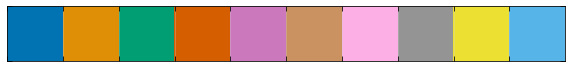

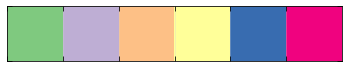

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import matplotlib as mpl
plt.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')

%matplotlib inline

sns.palplot(sns.color_palette('colorblind'))
palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
sns.palplot(palette)

In [12]:
import pandas as pd
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')
df = df.sort_values('Start Time (gamma ray)')
df.iloc[0]

Name                         V407 Cyg 2010
Class                                  NaN
Distance (kpc)                         2.7
Start Time (gamma ray)               55265
Duration (gamma ray)                    22
Peak Date (optical)             2010-03-10
RA (Deg)                           315.541
Dec. (Deg)                         45.7758
SPL gamma                             2.11
SPL gamma error                       0.06
SPL integrated flux                   5.77
SPL integrated flux error             0.55
SPL flux                          0.497163
SPL flux error                   0.0473899
EPL gamma                             1.23
EPL gamma error                        0.2
EPL cutoff                            1.44
EPL cutoff error                      0.36
EPL integrated flux                    4.3
EPL integrated flux error             0.54
EPL flux                           1.57042
EPL flux error                    0.197216
Source                             Fermi-I
Notes      

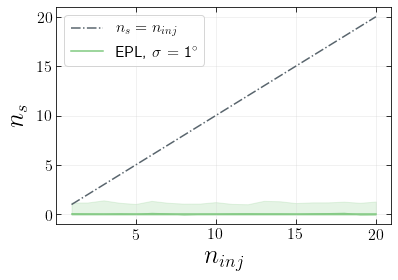

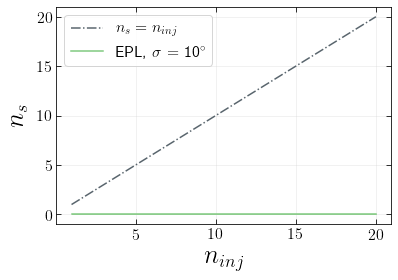

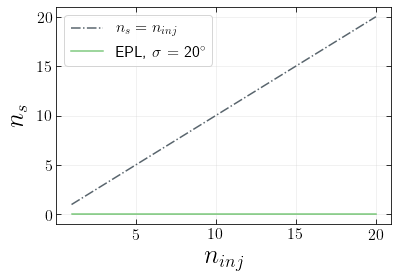

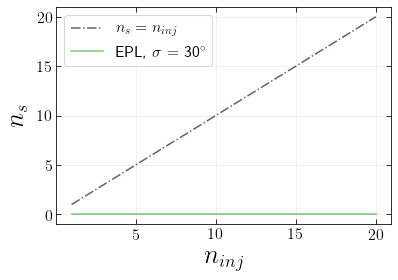

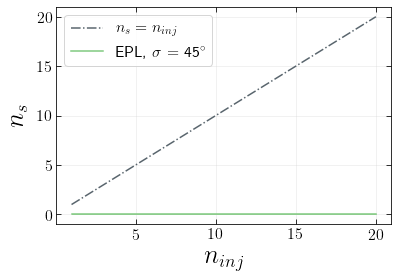

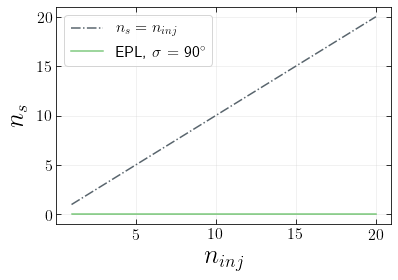

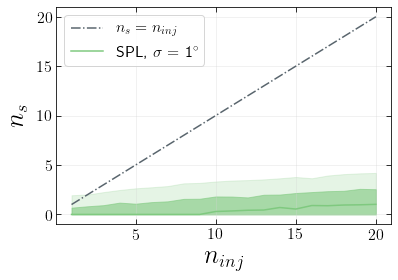

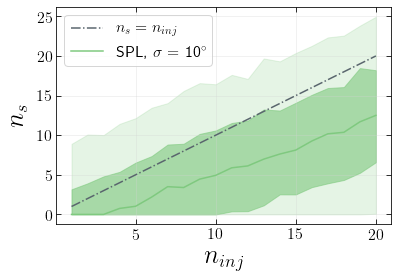

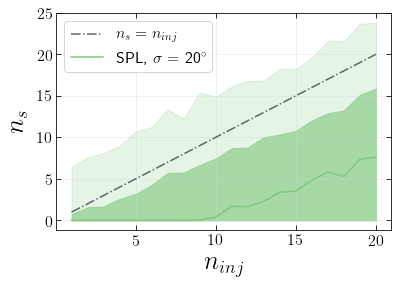

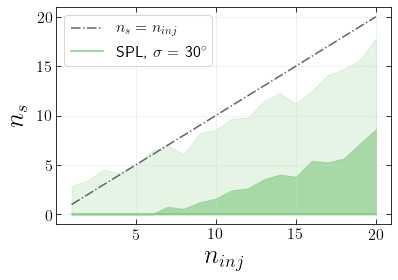

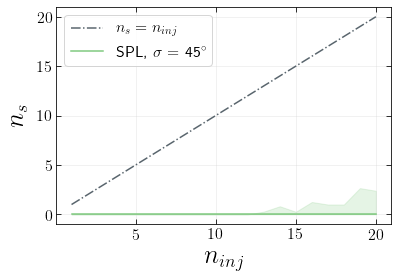

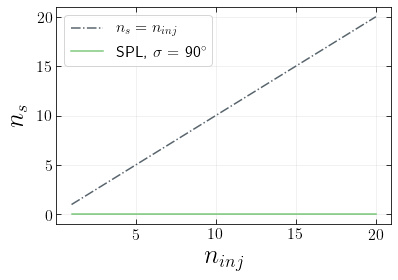

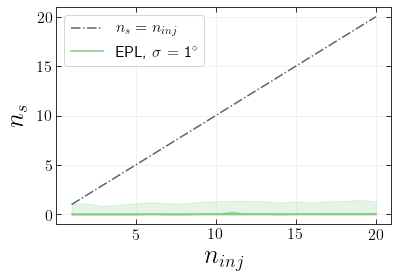

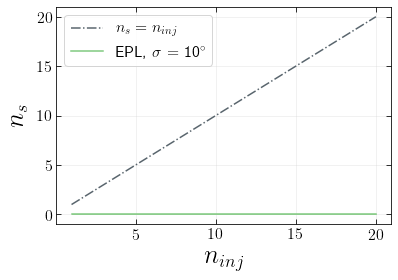

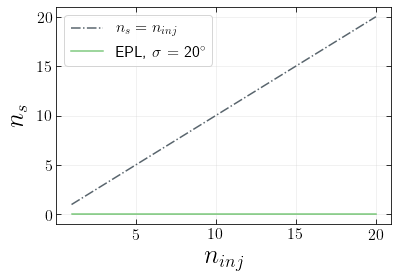

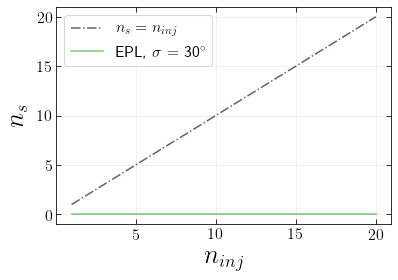

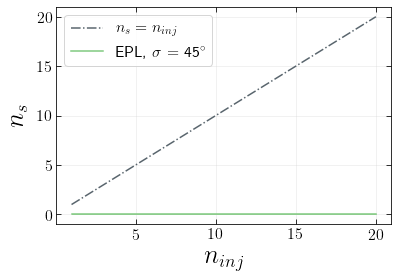

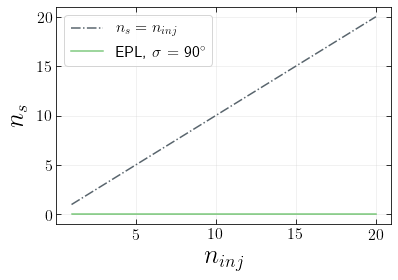

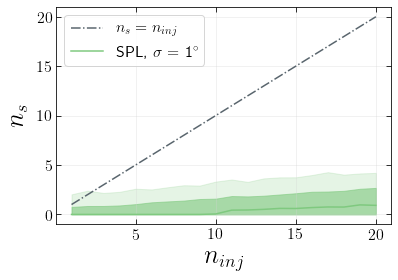

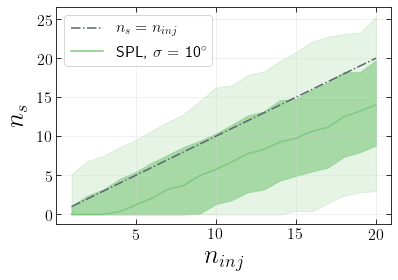

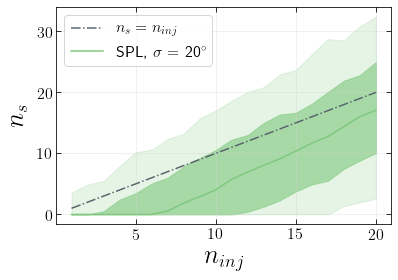

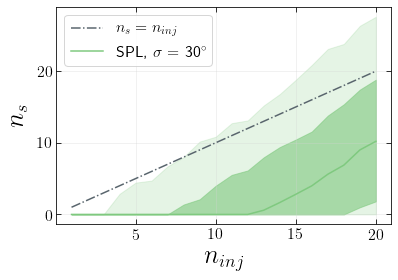

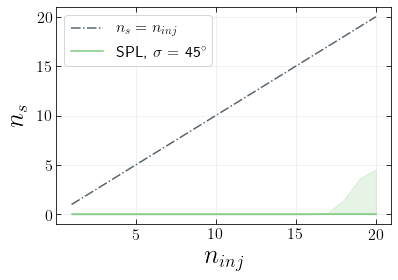

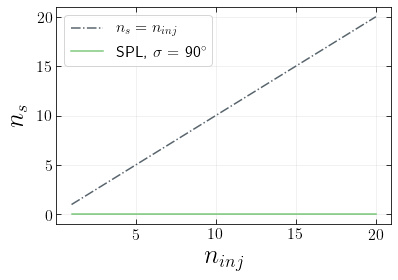

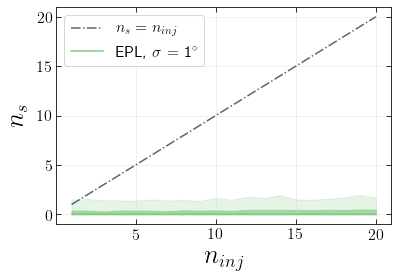

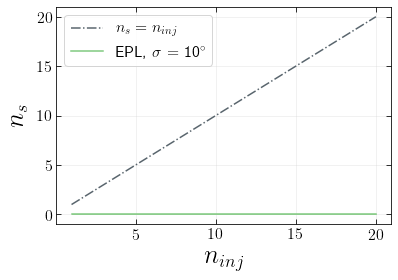

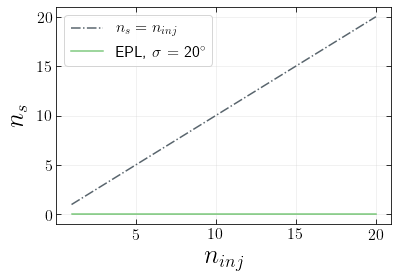

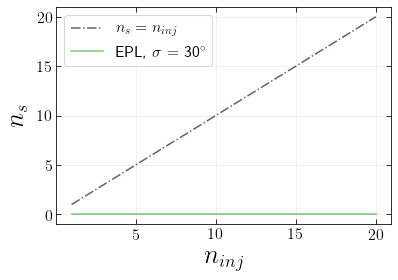

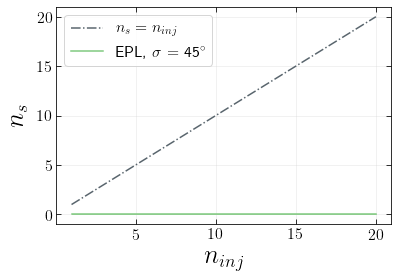

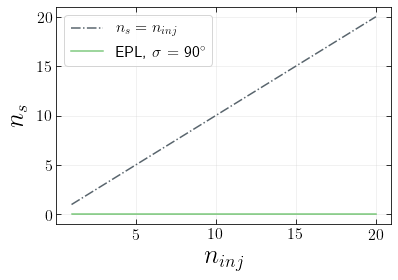

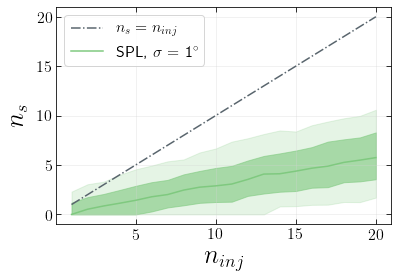

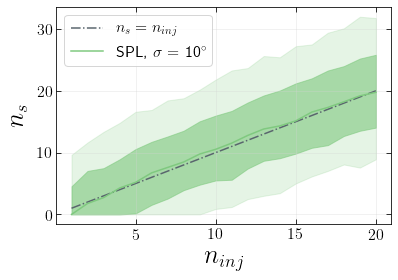

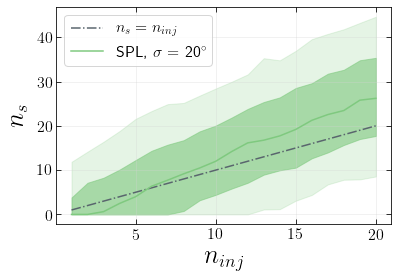

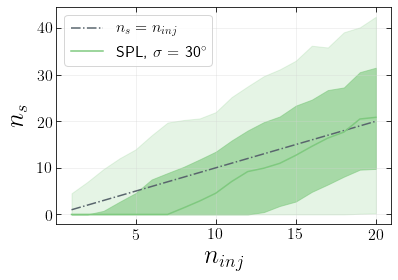

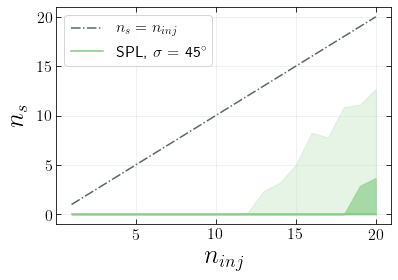

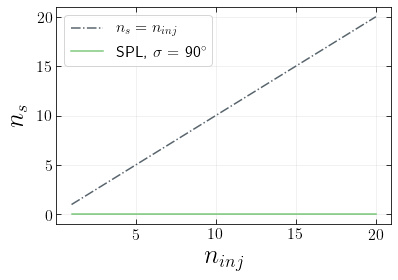

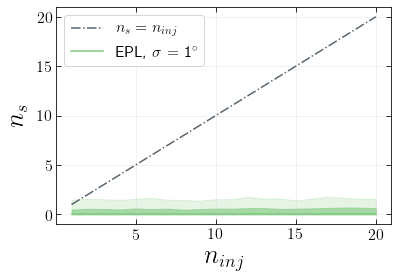

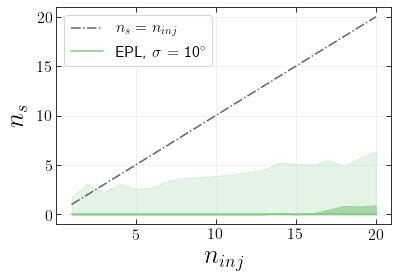

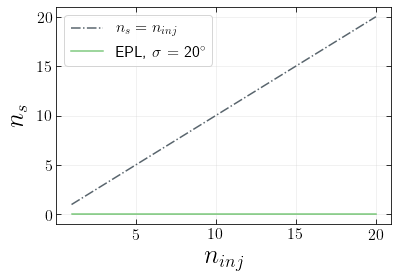

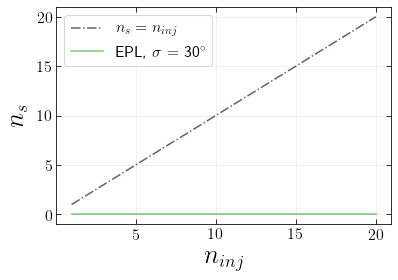

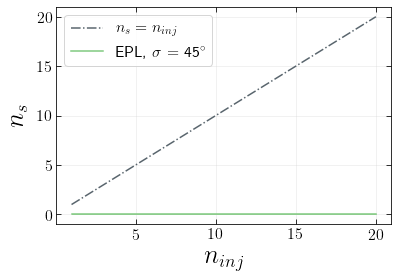

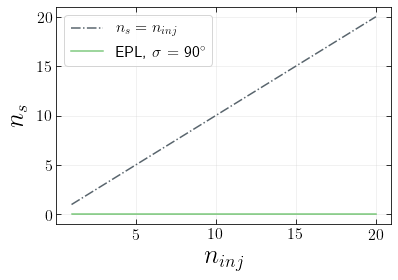

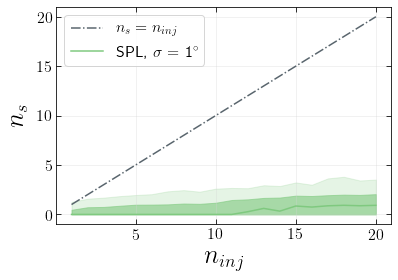

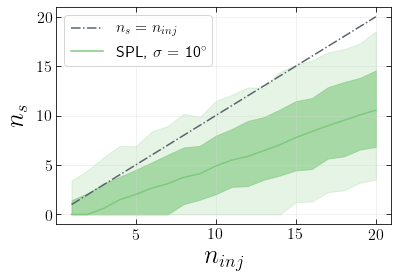

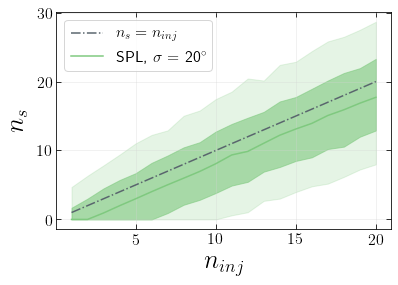

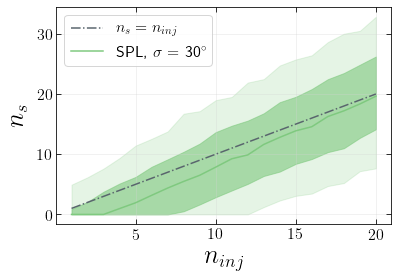

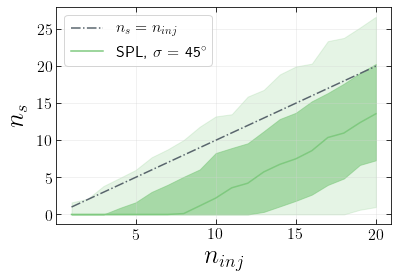

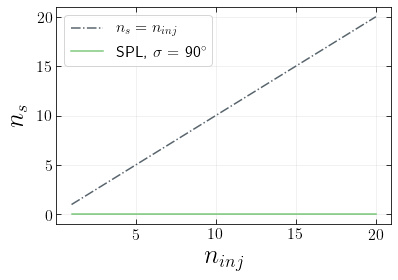

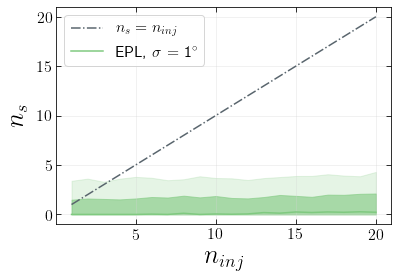

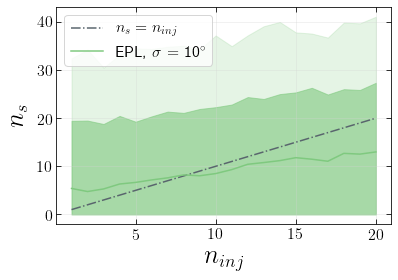

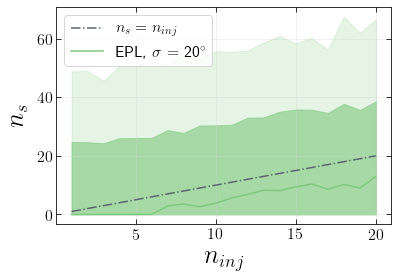

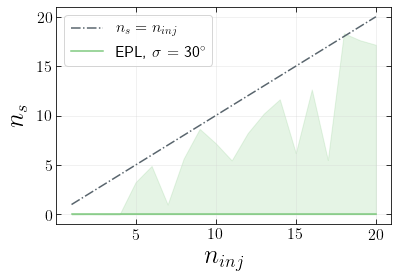

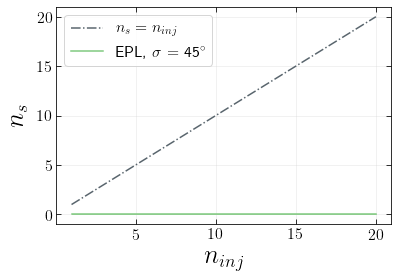

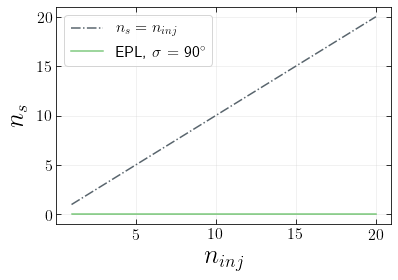

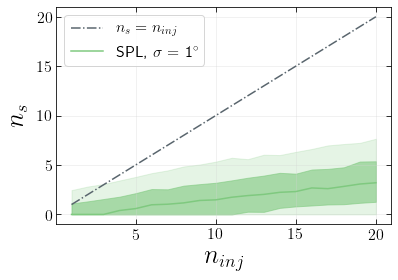

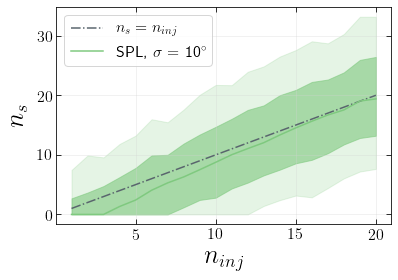

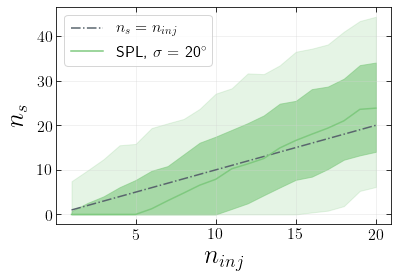

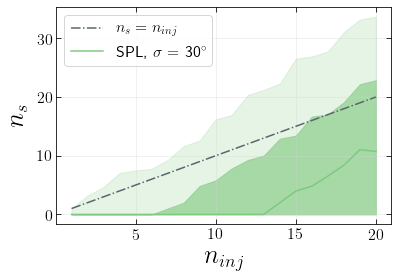

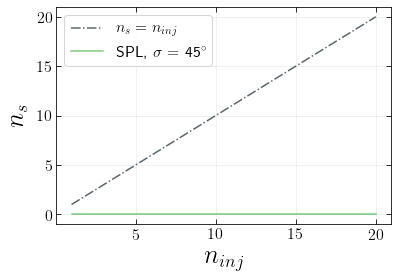

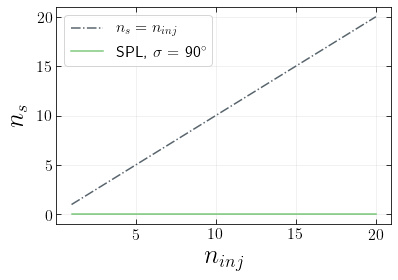

In [4]:
indices = [1,2,3,4,5,6]
spectra = ['EPL', 'SPL']
sigmas = [1, 10, 20, 30, 45, 90]
#allresults = results

for index in indices[:]:
    for spectrum in spectra[:]:
        for sigma in sigmas[:]:
            try:
                results = np.load('/data/user/apizzuto/Nova/analysis_trials/fits/index_{}_spec_{}_sigma_{}.npy'.format(index, spectrum, sigma))
            except IOError:
                continue
            novnam = df.iloc[index]['Name']
            novdec = df.iloc[index]['Dec. (Deg)']
            #allresults = np.append(allresults, results)
            #fits = np.array([[results['nsignal'][(results['n_inj'] == n) & (results['gamma'] == g)] for n in np.linspace(1, 20, 20)] for g in gammas])
            fits = [results['nsignal'][results['n_inj'] == n] for n in np.linspace(1, 20, 20)]
            lows_one = np.percentile(fits, 16, axis = 1)
            lows_two = np.percentile(fits, 2.5, axis = 1)
            meds = np.percentile(fits, 50, axis = 1)
            highs_one = np.percentile(fits, 84, axis = 1)
            highs_two = np.percentile(fits, 97.5, axis = 1)

            ns = np.linspace(1, 20, 20)

            plt.plot(ns, ns, ls = '-.', c = sns.xkcd_rgb['slate grey'], label = r'$n_s = n_{inj}$')
            plt.fill_between(ns, lows_one, highs_one, color = palette[0], alpha = 0.6)
            plt.fill_between(ns, lows_two, highs_two, color = palette[0], alpha = 0.2)
            plt.plot(ns, meds, color = palette[0], label = r'{}, $\sigma$ = {}'.format(spectrum, sigma) + r'$^{\circ}$')

            plt.legend(loc = 2, fontsize = 16)
            #plt.text(11, 3, r'$\Delta t$ = {:.2E} s'.format(deltaT))
            #plt.text(11, 1, r'$\sin \delta$ = {}'.format(sinDec))
            plt.xlabel(r'$n_{inj}$', fontsize = 26)
            plt.ylabel(r'$n_{s}$', fontsize = 26)
            plt.show()

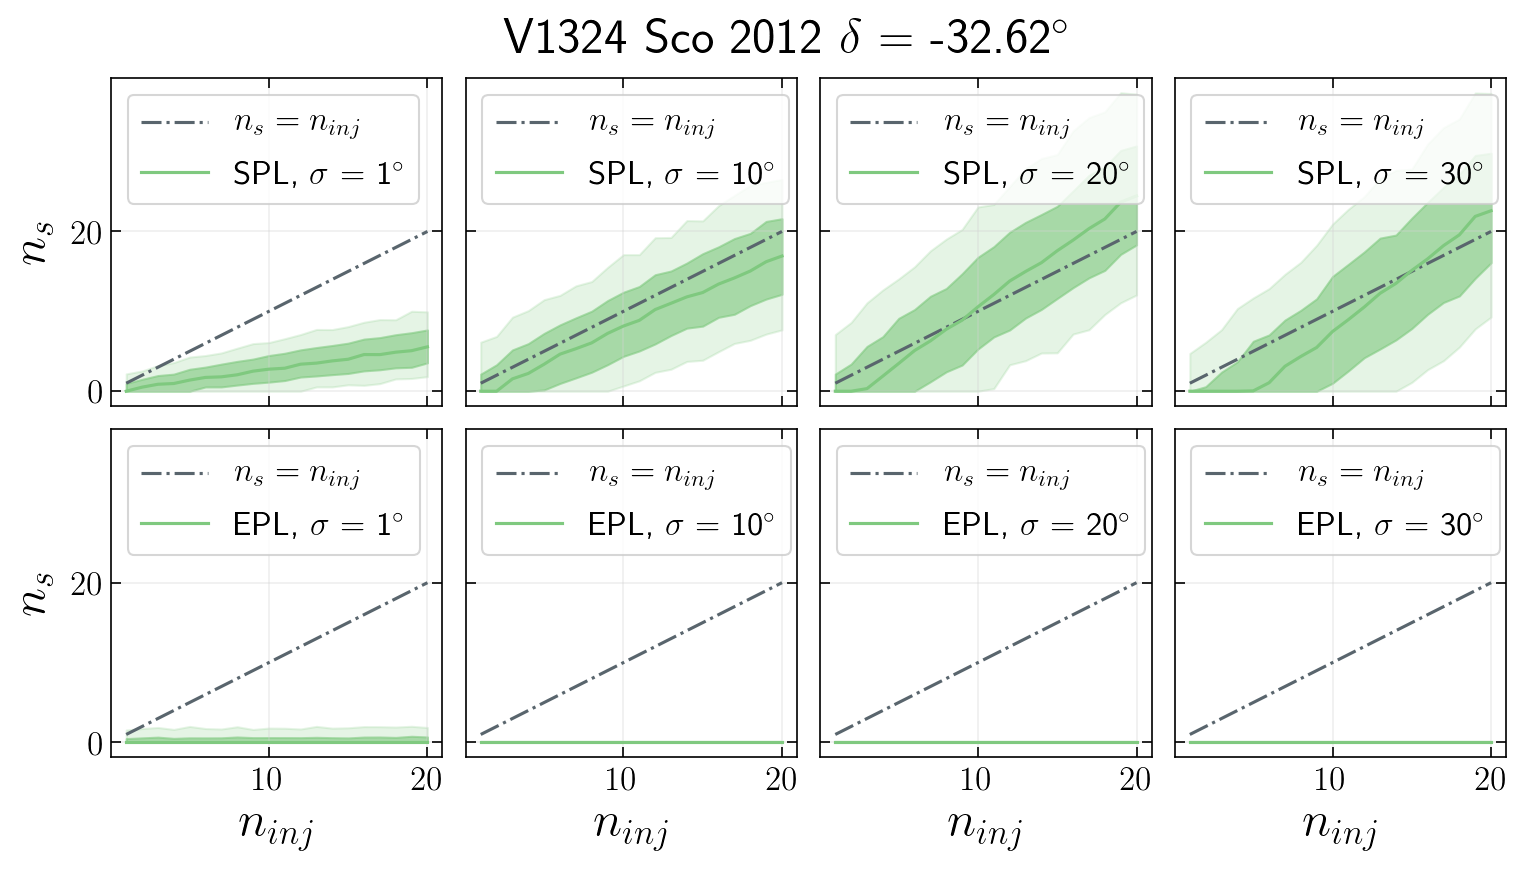

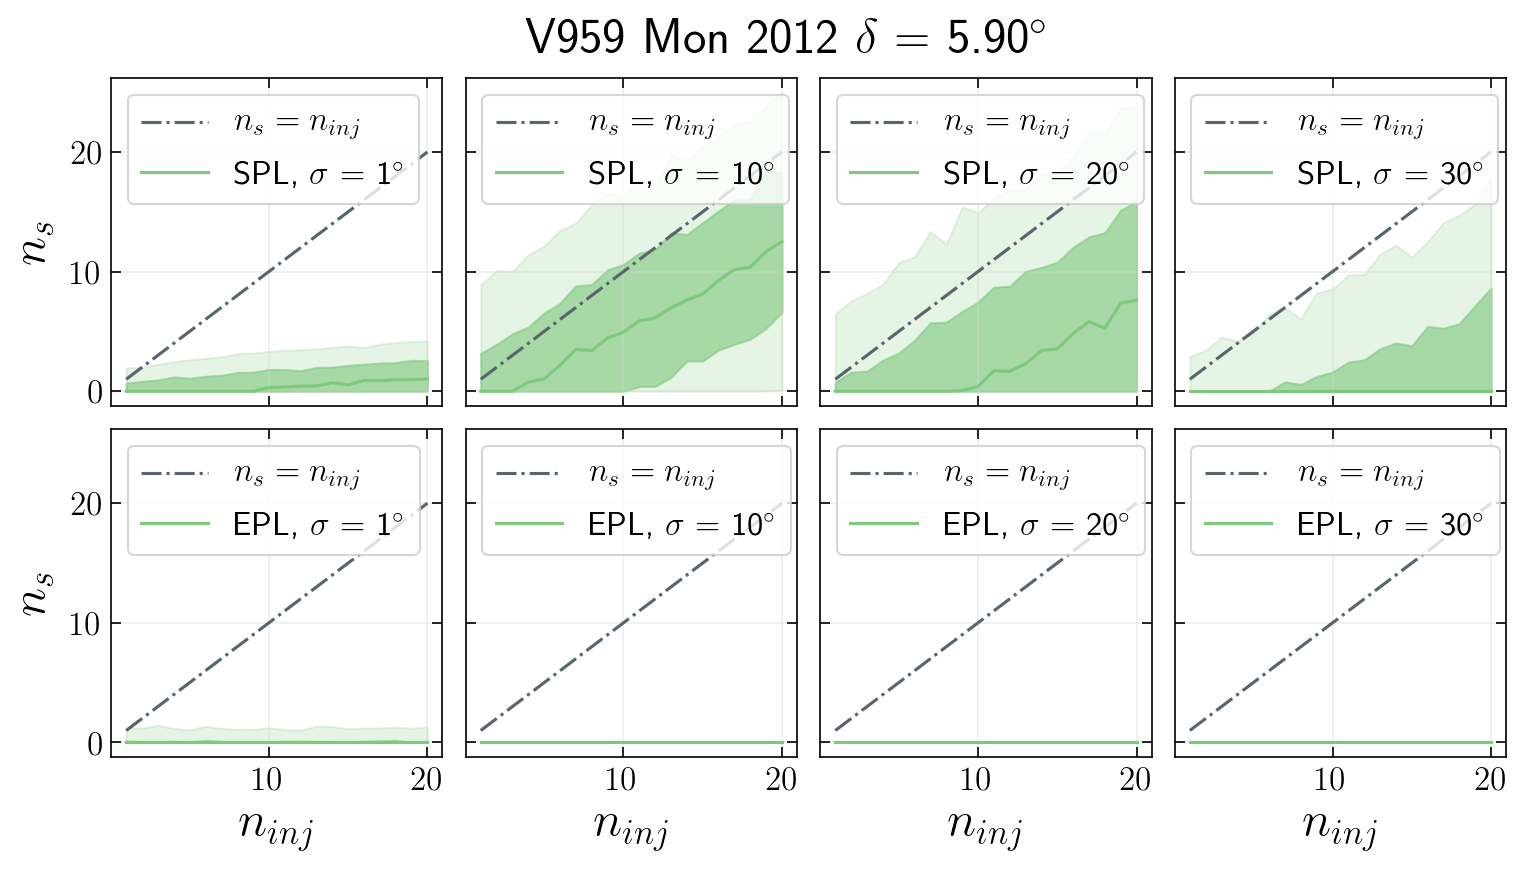

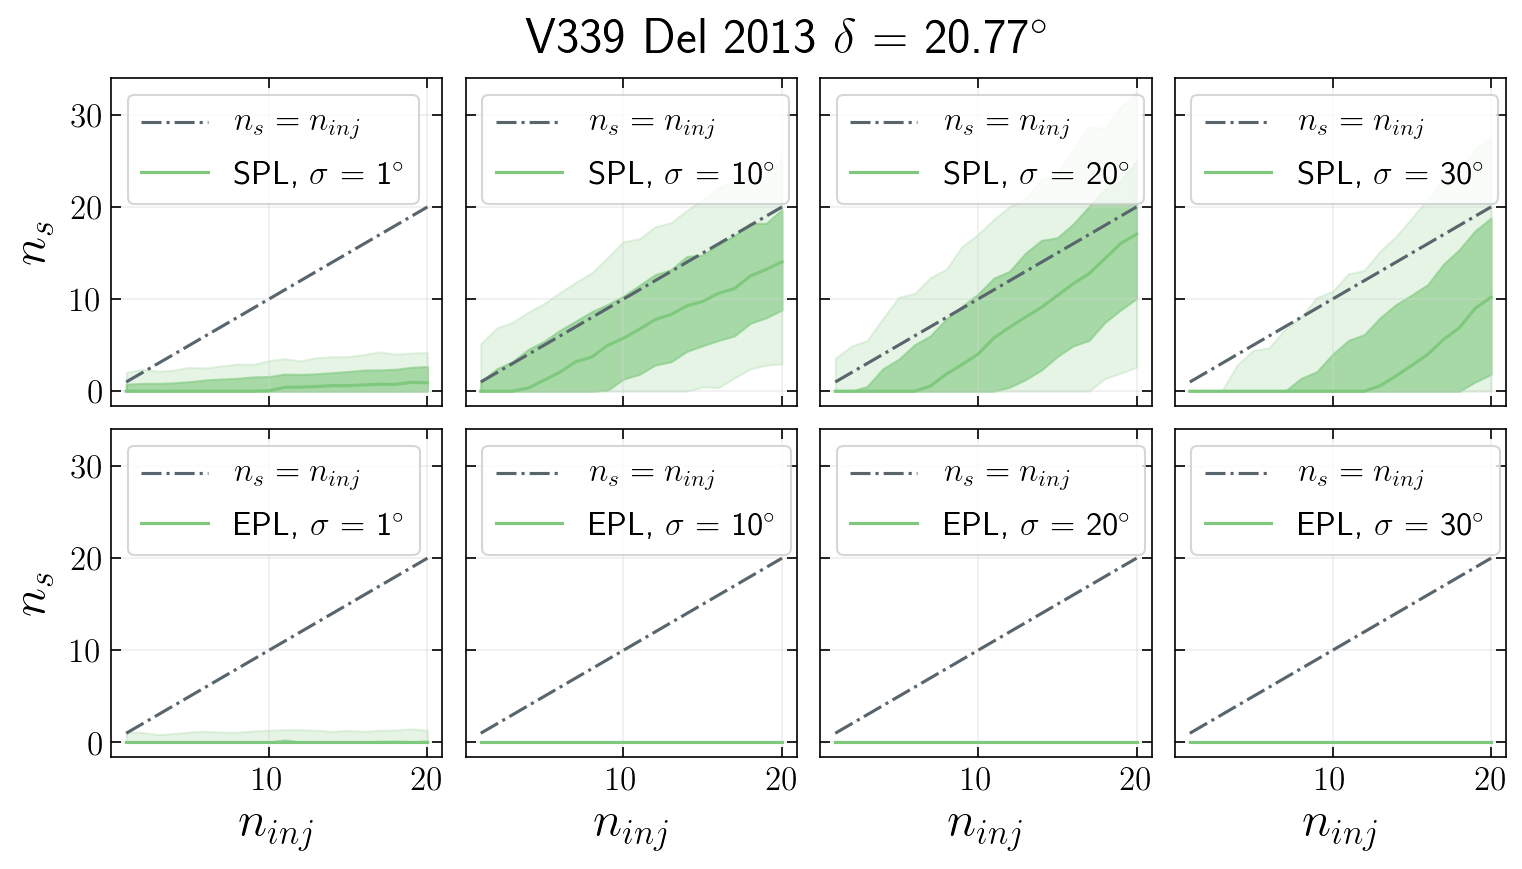

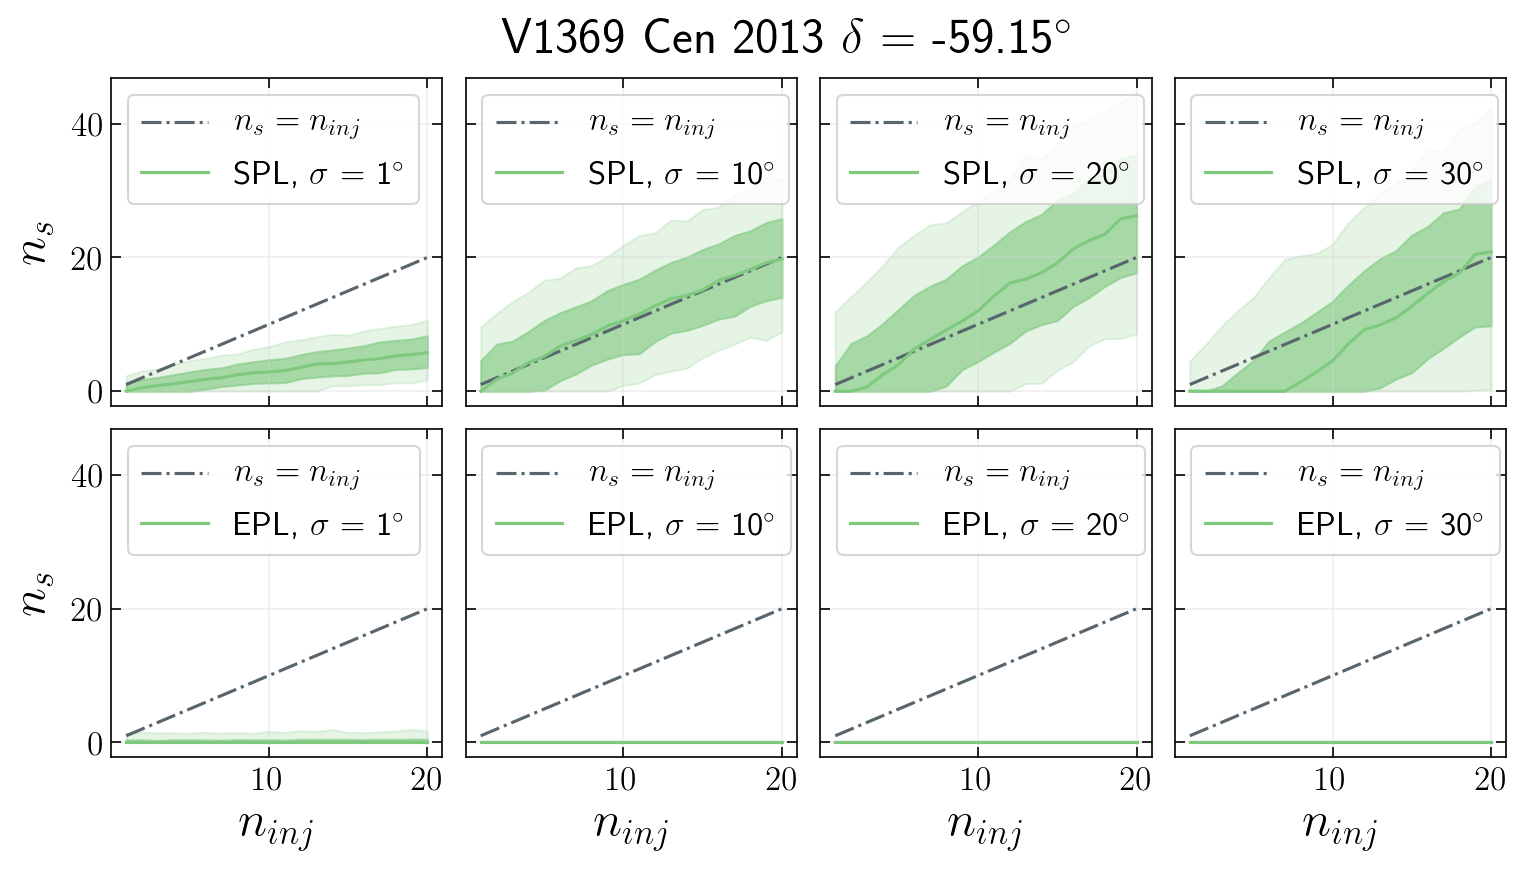

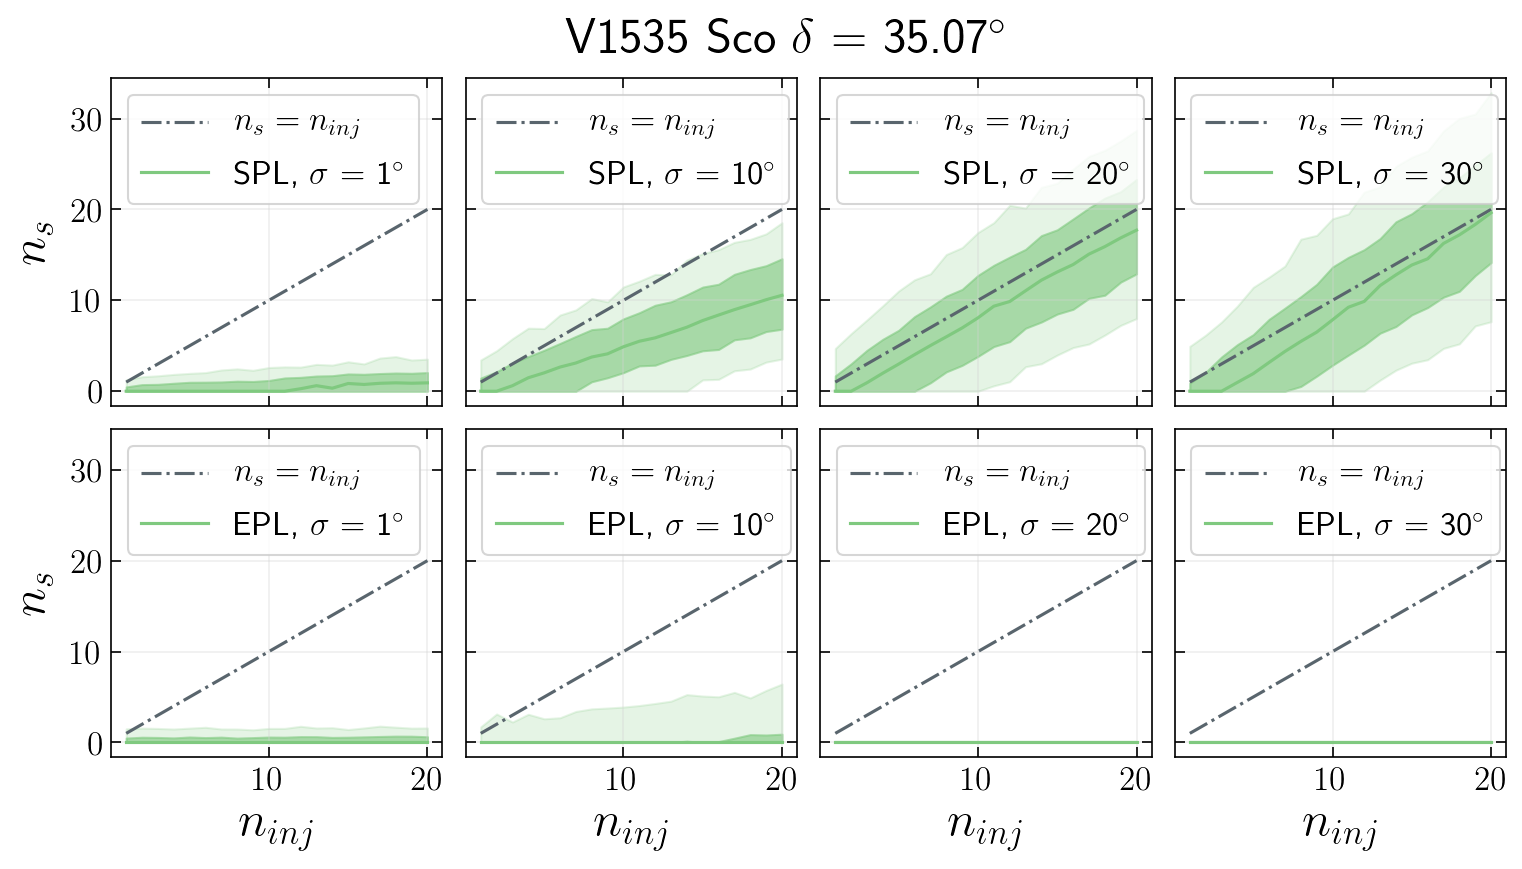

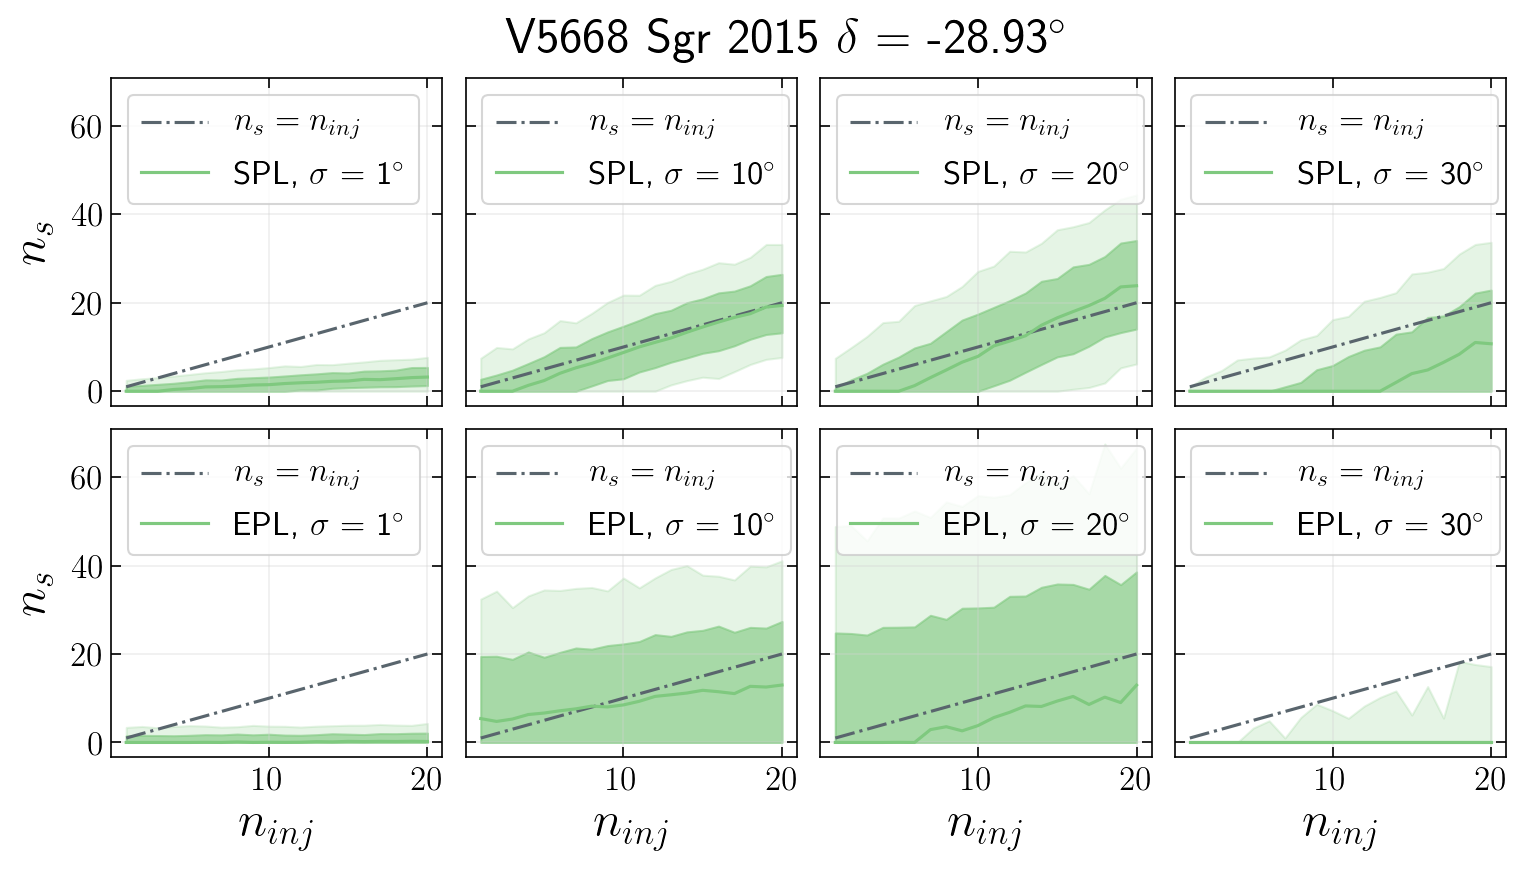

In [21]:
indices = [1,2,3,4,5,6]
spectra = ['SPL', 'EPL']
sigmas = [1, 10, 20, 30]
#allresults = results

for index in indices[:]:
    novnam = df.iloc[index]['Name']
    novdec = df.iloc[index]['Dec. (Deg)']
    fig, axs = plt.subplots(figsize=(12,6), nrows=2, ncols=4, sharex=True, sharey=True, dpi = 150)
    fig.subplots_adjust(hspace=0.07)
    fig.subplots_adjust(wspace=0.07)
    fig.suptitle(r'{} '.format(novnam) + r'$\delta$ = {:.2f}'.format(novdec) + r'$^{\circ}$', fontsize = 24, y = 0.95)
    for ii, spectrum in enumerate(spectra[:]):
        for jj, sigma in enumerate(sigmas[:]):
            try:
                results = np.load('/data/user/apizzuto/Nova/analysis_trials/fits/index_{}_spec_{}_sigma_{}.npy'.format(index, spectrum, sigma))
            except IOError:
                continue
            fits = [results['nsignal'][results['n_inj'] == n] for n in np.linspace(1, 20, 20)]
            lows_one = np.percentile(fits, 16, axis = 1)
            lows_two = np.percentile(fits, 2.5, axis = 1)
            meds = np.percentile(fits, 50, axis = 1)
            highs_one = np.percentile(fits, 84, axis = 1)
            highs_two = np.percentile(fits, 97.5, axis = 1)

            ns = np.linspace(1, 20, 20)

            axs[ii,jj].plot(ns, ns, ls = '-.', c = sns.xkcd_rgb['slate grey'], label = r'$n_s = n_{inj}$')
            axs[ii,jj].fill_between(ns, lows_one, highs_one, color = palette[0], alpha = 0.6)
            axs[ii,jj].fill_between(ns, lows_two, highs_two, color = palette[0], alpha = 0.2)
            axs[ii,jj].plot(ns, meds, color = palette[0], label = r'{}, $\sigma$ = {}'.format(spectrum, sigma) + r'$^{\circ}$')

            axs[ii,jj].legend(loc = 2, fontsize = 16)
            #plt.text(11, 3, r'$\Delta t$ = {:.2E} s'.format(deltaT))
            #plt.text(11, 1, r'$\sin \delta$ = {}'.format(sinDec))
            if ii == 1:
                axs[ii,jj].set_xlabel(r'$n_{inj}$', fontsize = 24)
            if jj == 0:
                axs[ii,jj].set_ylabel(r'$n_{s}$', fontsize = 24)
    plt.show()